# Boxplot and Outliers

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Criando um dataset de exemplo
df = pd.DataFrame({'Produto': ['Macarrão', 'Arroz', 'Feijão', 'Carne', 'Pão', \
                            'Óleo', 'Farinha', 'Arroz', 'Carne', 'Sabão em Pó'],
                   'Mogi-Mirim': [12000, 8000, 32400, 4589, 10450, 6500, 27235, 8000, 987, 14518],
                   'Campinas': [784, 3459, 8453, 392, 934, 8500, 3835, 3459, 518, 1498],
                   'São Paulo': [823, 6518, 870, 8918, 209, 7100, 7138, 6518, 163, 9183]})

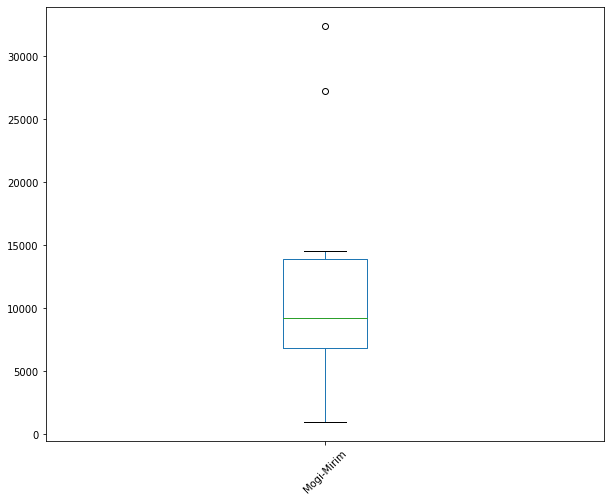

In [3]:
# Utilizando Pandas
df.boxplot(column='Mogi-Mirim', grid=False, rot=45, figsize=(10,8));

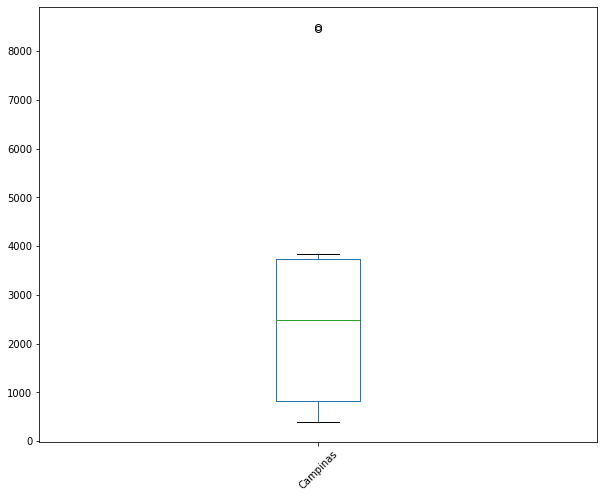

In [4]:
# Utilizando Pandas (maneira alternativa ao anterior)
df[['Campinas']].boxplot(grid=False, rot=45, figsize=(10,8));

**Selecionando colunas para exibição do Boxplot**

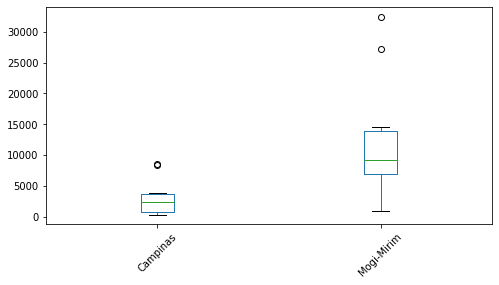

In [5]:
df[['Campinas', 'Mogi-Mirim']].boxplot(grid=False, rot=45, figsize=(8,4));

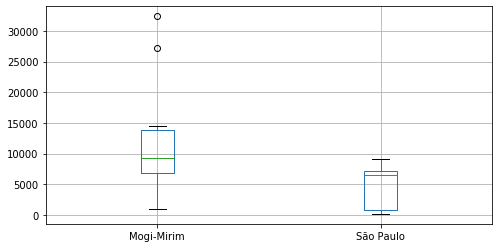

In [6]:
# Utilizando Pandas (maneira alternativa ao anterior)
# Neste caso criamos uma nova variável
mogi_sp = df[['Mogi-Mirim', 'São Paulo']]
mogi_sp.boxplot(figsize=(8,4));

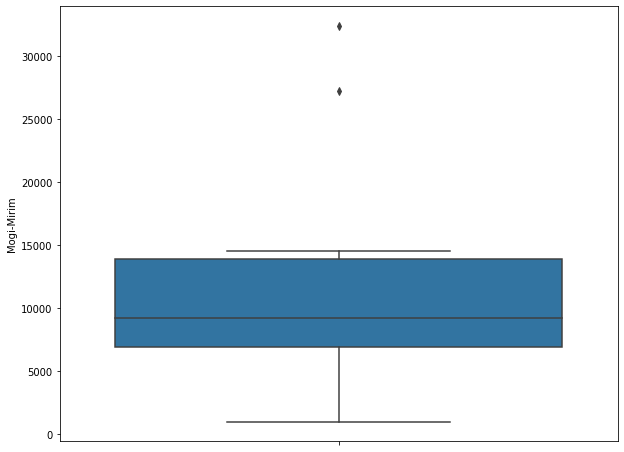

In [7]:
# Visualizando 1 variável
# Utilizando Matplotlib e Seaborn
fig, ax = plt.subplots(figsize = (10, 8))
sns.boxplot(df['Mogi-Mirim'],
            orient = 'v');

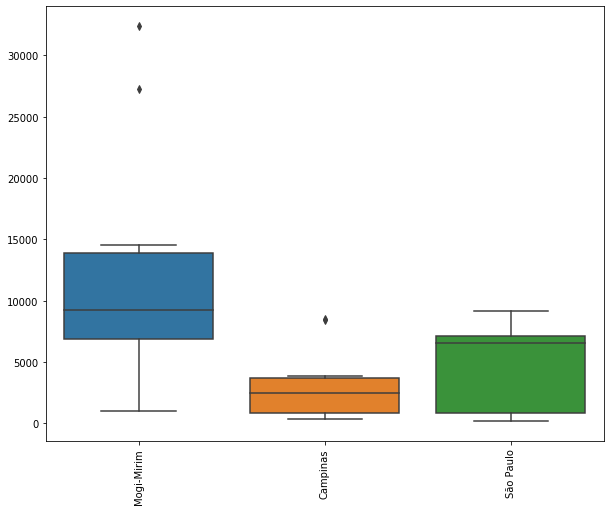

In [8]:
# Visualizando mais de 1 variável
fig, ax = plt.subplots(figsize = (10, 8))
bp = sns.boxplot(data = df)
bp.set_xticklabels(bp.get_xticklabels(), rotation=90);

**Efetuando a padronização dos dados para melhor visualização do boxplot**

In [9]:
# Instanciando o StandardScaler
scaler = StandardScaler()
# Aplicando a transformação
scaled_array = scaler.fit_transform(df[['Mogi-Mirim', 'Campinas', 'São Paulo']])
# Criando um dataframe com os dados transformados
scaled_data = pd.DataFrame(scaled_array, columns = ['Mogi-Mirim', 'Campinas', 'São Paulo'])
# Visualizando as 5 primeiras linhas/observações
scaled_data.head()

,Mogi-Mirim,Campinas,São Paulo
0,-0.049506,-0.822120,-1.101835
1,-0.472727,0.094507,0.498509
2,2.108918,1.805773,-1.088627
3,-0.833628,-0.956445,1.172930
4,-0.213504,-0.770721,-1.274374


In [10]:
scaled_data.describe()

,Mogi-Mirim,Campinas,São Paulo
count,1.000000e+01,1.000000e+01,10.000000
mean,2.775558e-18,4.440892e-17,0.000000
std,1.054093e+00,1.054093e+00,1.054093
min,-1.214738e+00,-9.564448e-01,-1.287301
25%,-5.917575e-01,-8.092705e-01,-1.098533
50%,-3.431155e-01,-2.414756e-01,0.498509
75%,1.503068e-01,1.911382e-01,0.670065
max,2.108918e+00,1.821878e+00,1.247397


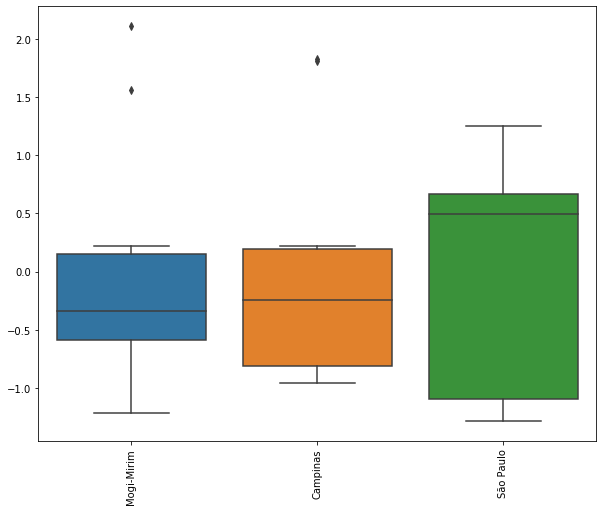

In [11]:
fig, ax = plt.subplots(figsize = (10, 8))
bp = sns.boxplot(data = scaled_data)
bp.set_xticklabels(bp.get_xticklabels(), rotation=90);

In [12]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

# Interquantile range
IQR = Q3 - Q1

print(IQR)

Mogi-Mirim    7013.50
Campinas      2919.50
São Paulo     6293.75
dtype: float64


In [13]:
# Removendo outliers
outliers_removed_data = df[~ ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
outliers_removed_data.shape

(7, 4)

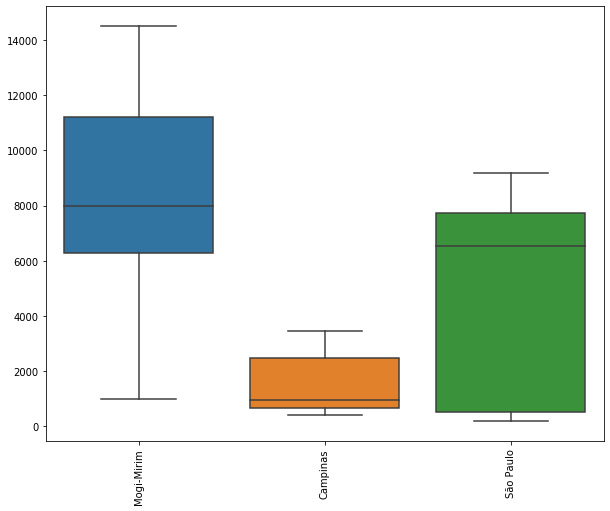

In [14]:
fig, ax = plt.subplots(figsize = (10, 8))
bp = sns.boxplot(data = outliers_removed_data)
bp.set_xticklabels(bp.get_xticklabels(), rotation=90);

In [15]:
outliers_removed_data

,Produto,Mogi-Mirim,Campinas,São Paulo
0,Macarrão,12000,784,823
1,Arroz,8000,3459,6518
3,Carne,4589,392,8918
4,Pão,10450,934,209
7,Arroz,8000,3459,6518
8,Carne,987,518,163
9,Sabão em Pó,14518,1498,9183


## Boxen plot

https://seaborn.pydata.org/generated/seaborn.boxenplot.html

This style of plot was originally named a “letter value” plot because it shows a large number of quantiles that are defined as “letter values”. It is similar to a box plot in plotting a nonparametric representation of a distribution in which all features correspond to actual observations. By plotting more quantiles, it provides more information about the shape of the distribution, particularly in the tails. For a more extensive explanation, you can read the paper that introduced the plot:

https://vita.had.co.nz/papers/letter-value-plot.html

In [16]:
from IPython.display import Image
Image(url='https://github.com/janderfg/Examples/blob/master/images/boxen-plot.png?raw=true', width=500, height=200)

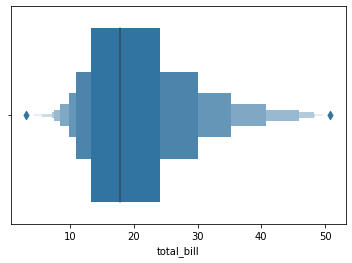

In [17]:
# sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.boxenplot(x=tips["total_bill"])

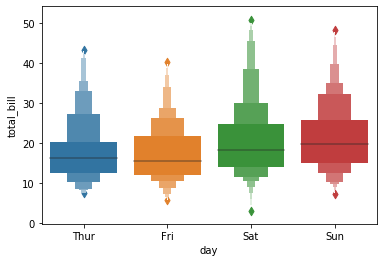

In [18]:
ax = sns.boxenplot(x="day", y="total_bill", data=tips)

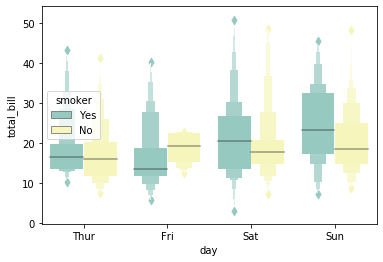

In [19]:
ax = sns.boxenplot(x="day", y="total_bill", hue="smoker",
                   data=tips, palette="Set3")

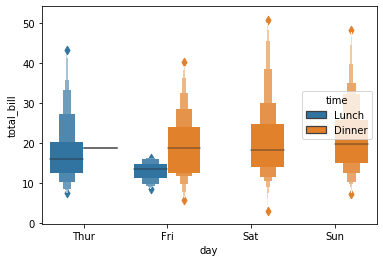

In [20]:
ax = sns.boxenplot(x="day", y="total_bill", hue="time",
                   data=tips, linewidth=2.5)

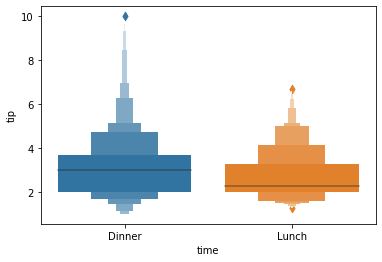

In [21]:
ax = sns.boxenplot(x="time", y="tip", data=tips,
                   order=["Dinner", "Lunch"])

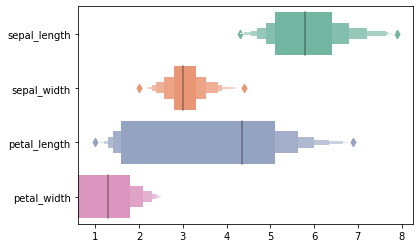

In [22]:
iris = sns.load_dataset("iris")
ax = sns.boxenplot(data=iris, orient="h", palette="Set2")

Use `stripplot()` to show the datapoints on top of the boxes:

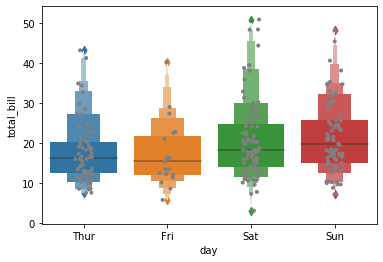

In [23]:
ax = sns.boxenplot(x="day", y="total_bill", data=tips)
ax = sns.stripplot(x="day", y="total_bill", data=tips,
                   size=4, color="gray")

Use `catplot()` to combine `boxenplot()` and a `FacetGrid`. This allows grouping within additional categorical variables. Using `catplot()` is safer than using `FacetGrid` directly, as it ensures synchronization of variable order across facets:

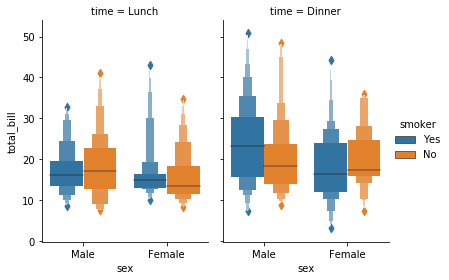

In [24]:
g = sns.catplot(x="sex", y="total_bill",
                hue="smoker", col="time",
                data=tips, kind="boxen",
                height=4, aspect=.7);